## EDA Project

### Group No. - 13
**Members:**
- 202201024 Hitarth Bhatt
- 202201513 Tirth Modi
- 202203004 Heet Dipeshe 

<h2> Topic: Heart Disease </h2> 

> <h4> <b>Problem Statement</b>: Analyzing Trends and Behavioral Risk Factors in U.S. Heart Disease Mortality (2015-2021)</h4>

<p>Heart disease remains a persistent public health challenge in the U.S., with mortality rates influenced by behavioral risk factors and showing significant geographic variation. To combat this epidemic effectively, understanding how mortality rates have changed over time and the key behavioral contributors to these trends is crucial.

Using mortality rate datasets from 2015-2017, 2017-2019, and 2019-2021, along with the Behavioral Risk Factor Surveillance System (BRFSS) data, this project aims to:

1. Explore temporal trends in heart disease mortality across states and counties.
2. Investigate correlations between behavioral risk factors (e.g., smoking, obesity) and mortality rates over different periods.
3. Highlight regions with rising or consistently high mortality rates and identify the primary contributing factors.
4. Provide actionable insights to support public health planning and resource allocation.</p>


> <h4> <b>Approach:</b> </h4> <p>
1. Trend Analysis:
    - Visualize heart disease mortality trends (2015-2021) across states and counties.
    - Highlight regions with significant increases or decreases.

2. Comparison Over Time:
    - Identify changes in correlations and mortality patterns across the three periods.

3. Prediction Insights:
    - Provide region-specific and behavior-focused recommendations based on findings.</p>

## CODE 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

In [7]:
url_1 = 'https://raw.githubusercontent.com/TirthModi/Heart_Disease_Data_Analysis_using_Python/refs/heads/main/Dataset/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2015-2017.csv'
url_2 = 'https://raw.githubusercontent.com/TirthModi/Heart_Disease_Data_Analysis_using_Python/refs/heads/main/Dataset/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2017-2019.csv'
url_3 = 'https://raw.githubusercontent.com/TirthModi/Heart_Disease_Data_Analysis_using_Python/refs/heads/main/Dataset/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv'

# Loading Datasets
Mortality_Rate_2015_17 = pd.read_csv(url_1)
Mortality_Rate_2017_19 = pd.read_csv(url_2)
Mortality_Rate_2019_21 = pd.read_csv(url_3)


In [ ]:
# Initial Structure
Mortality_Rate_2015_17.head(10)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference Column
0,2016,CT,Connecticut,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,232.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Male,Race/Ethnicity,Hispanic,T2,9,41.6179,-72.7254,POINT (-72.7254 41.6179)
1,2016,IN,Indiana,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,202.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Male,Race/Ethnicity,Hispanic,T2,18,39.9128,-86.2757,POINT (-86.2757 39.9128)
2,2016,GU,Guam,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Gender,Male,Race/Ethnicity,White,T2,66,13.4431,144.7770,POINT (144.777 13.4431)
3,2016,AZ,Arizona,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,282.2,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Overall,Race/Ethnicity,White,T2,4,34.2921,-111.6640,POINT (-111.664 34.2921)
4,2016,AR,Arkansas,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,343.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Female,Race/Ethnicity,White,T2,5,34.8982,-92.4340,POINT (-92.434 34.8982)
5,2016,FL,Florida,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,222.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Female,Race/Ethnicity,White,T2,12,28.6588,-82.4970,POINT (-82.497 28.6588)
6,2016,ID,Idaho,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Female,Race/Ethnicity,Overall,T2,16,44.3858,-114.6610,POINT (-114.661 44.3858)
7,2016,IA,Iowa,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,136.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Overall,Race/Ethnicity,Hispanic,T2,19,42.0760,-93.5022,POINT (-93.5022 42.076)
8,2016,AK,Alaska,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,260.9,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Overall,Race/Ethnicity,White,T2,2,64.3173,-152.5710,POINT (-152.571 64.3173)
9,2016,IA,Iowa,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,407.2,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Gender,Male,Race/Ethnicity,Overall,T2,19,42.0760,-93.5022,POINT (-93.5022 42.076)


In [ ]:
print("Initial Dataset Info:")
print(Mortality_Rate_2015_17.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59094 non-null  int64  
 1   LocationAbbr                59094 non-null  object 
 2   LocationDesc                59094 non-null  object 
 3   GeographicLevel             59094 non-null  object 
 4   DataSource                  59094 non-null  object 
 5   Class                       59094 non-null  object 
 6   Topic                       59094 non-null  object 
 7   Data_Value                  32230 non-null  float64
 8   Data_Value_Unit             59094 non-null  object 
 9   Data_Value_Type             59094 non-null  object 
 10  Data_Value_Footnote_Symbol  26864 non-null  object 
 11  Data_Value_Footnote         26864 non-null  object 
 12  StratificationCategory1     59094 non-null  object 
 13  Stratific

In [ ]:
Mortality_Rate_2015_17.describe()

,Year,Data_Value,LocationID,Y_lat,X_lon
count,59094.0,32230.000000,59094.000000,59076.000000,59076.000000
mean,2016.0,344.989392,30922.418824,37.901745,-91.406452
std,0.0,142.543952,16737.634283,6.326395,15.942302
min,2016.0,0.000000,0.000000,-14.301754,-170.719474
25%,2016.0,247.100000,18133.000000,34.326243,-98.129615
50%,2016.0,334.200000,29205.000000,38.220930,-89.931055
75%,2016.0,428.300000,46089.000000,41.695739,-82.890640
max,2016.0,3798.600000,78030.000000,69.309529,145.751259


In [ ]:
Mortality_Rate_2015_17.isnull().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26864
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32230
Data_Value_Footnote           32230
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            18
X_lon                            18
Georeference Column              18
dtype: int64

In [ ]:
Mortality_Rate_2015_17.nunique()

Year                             1
LocationAbbr                    57
LocationDesc                  2023
GeographicLevel                  3
DataSource                       1
Class                            1
Topic                            1
Data_Value                    6182
Data_Value_Unit                  1
Data_Value_Type                  2
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
StratificationCategory1          1
Stratification1                  3
StratificationCategory2          1
Stratification2                  6
TopicID                          1
LocationID                    3283
Y_lat                         3282
X_lon                         3282
Georeference Column           3282
dtype: int64

In [ ]:
# Standardize column names for uniformity
Mortality_Rate_2015_17.columns = Mortality_Rate_2015_17.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')
Mortality_Rate_2017_19.columns = Mortality_Rate_2017_19.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')
Mortality_Rate_2019_21.columns = Mortality_Rate_2019_21.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

In [ ]:
# Retain only relevant columns
columns_to_keep = [
    'year', 'locationabbr', 'locationdesc', 'geographiclevel', 'data_value', 
    'data_value_unit', 'data_value_type', 'stratificationcategory1', 
    'stratification1', 'x_lon', 'y_lat'
]
Mortality_Rate_2015_17 = Mortality_Rate_2015_17[columns_to_keep]
Mortality_Rate_2017_19 = Mortality_Rate_2017_19[columns_to_keep]
Mortality_Rate_2019_21 = Mortality_Rate_2019_21[columns_to_keep]

In [ ]:
# Rename columns for better understanding
Mortality_Rate_2015_17.rename(columns={
    'locationabbr': 'state_abbr',
    'locationdesc': 'state_or_county',
    'data_value': 'mortality_rate',
    'data_value_unit': 'rate_unit',
    'data_value_type': 'rate_type',
    'stratificationcategory1': 'demographic_category',
    'stratification1': 'demographic_value',
    'x_lon': 'longitude',
    'y_lat': 'latitude'
}, inplace=True)

Mortality_Rate_2017_19.rename(columns={
    'locationabbr': 'state_abbr',
    'locationdesc': 'state_or_county',
    'data_value': 'mortality_rate',
    'data_value_unit': 'rate_unit',
    'data_value_type': 'rate_type',
    'stratificationcategory1': 'demographic_category',
    'stratification1': 'demographic_value',
    'x_lon': 'longitude',
    'y_lat': 'latitude'
}, inplace=True)

Mortality_Rate_2019_21.rename(columns={
    'locationabbr': 'state_abbr',
    'locationdesc': 'state_or_county',
    'data_value': 'mortality_rate',
    'data_value_unit': 'rate_unit',
    'data_value_type': 'rate_type',
    'stratificationcategory1': 'demographic_category',
    'stratification1': 'demographic_value',
    'x_lon': 'longitude',
    'y_lat': 'latitude'
}, inplace=True)

In [ ]:
# Handle missing values
print("\nMissing Values Before Cleaning:")
print(Mortality_Rate_2015_17.isnull().sum())


Missing Values Before Cleaning:
year                        0
state_abbr                  0
state_or_county             0
geographiclevel             0
mortality_rate          26864
rate_unit                   0
rate_type                   0
demographic_category        0
demographic_value           0
longitude                  18
latitude                   18
dtype: int64


In [ ]:
# Drop rows with missing critical data (e.g., 'mortality_rate', 'state_or_county', 'longitude', 'latitude')
critical_columns = ['mortality_rate', 'state_or_county', 'longitude', 'latitude']
Mortality_Rate_2015_17 = Mortality_Rate_2015_17.dropna(subset=critical_columns)
Mortality_Rate_2017_19 = Mortality_Rate_2017_19.dropna(subset=critical_columns)
Mortality_Rate_2019_21 = Mortality_Rate_2019_21.dropna(subset=critical_columns)

In [ ]:
# Fill missing demographic values with "Not Specified"
Mortality_Rate_2015_17['demographic_value'].fillna('Not Specified')
Mortality_Rate_2017_19['demographic_value'].fillna('Not Specified')
Mortality_Rate_2019_21['demographic_value'].fillna('Not Specified')

0           Male
1        Overall
2        Overall
5         Female
6        Overall
          ...   
78773     Female
78774    Overall
78778    Overall
78785    Overall
78786    Overall
Name: demographic_value, Length: 34406, dtype: object

In [ ]:
# Convert 'mortality_rate' to numeric
Mortality_Rate_2015_17['mortality_rate'] = pd.to_numeric(Mortality_Rate_2015_17['mortality_rate'], errors='coerce')

In [ ]:
# Drop rows with invalid mortality_rate values (e.g., NaN or non-numeric)
Mortality_Rate_2015_17 = Mortality_Rate_2015_17.dropna(subset=['mortality_rate'])
Mortality_Rate_2017_19 = Mortality_Rate_2017_19.dropna(subset=['mortality_rate'])
Mortality_Rate_2019_21 = Mortality_Rate_2019_21.dropna(subset=['mortality_rate'])

In [ ]:
# Verify data types
print("\nDataset Info After Cleaning:")
print(Mortality_Rate_2015_17.info())



Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 32212 entries, 0 to 59093
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  32212 non-null  int64  
 1   state_abbr            32212 non-null  object 
 2   state_or_county       32212 non-null  object 
 3   geographiclevel       32212 non-null  object 
 4   mortality_rate        32212 non-null  float64
 5   rate_unit             32212 non-null  object 
 6   rate_type             32212 non-null  object 
 7   demographic_category  32212 non-null  object 
 8   demographic_value     32212 non-null  object 
 9   longitude             32212 non-null  float64
 10  latitude              32212 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.9+ MB
None


In [ ]:
# Preview cleaned data
print("\nCleaned Data Preview:")
print(Mortality_Rate_2015_17.head(20))


Cleaned Data Preview:
    year state_abbr state_or_county geographiclevel  mortality_rate  \
0   2016         CT     Connecticut           State           232.0   
1   2016         IN         Indiana           State           202.0   
3   2016         AZ         Arizona           State           282.2   
4   2016         AR        Arkansas           State           343.0   
5   2016         FL         Florida           State           222.1   
6   2016         ID           Idaho           State           243.0   
7   2016         IA            Iowa           State           136.1   
8   2016         AK          Alaska           State           260.9   
9   2016         IA            Iowa           State           407.2   
10  2016         AZ         Arizona           State           273.4   
11  2016         AR        Arkansas           State           432.2   
12  2016         GU            Guam           State           453.7   
13  2016         AZ         Arizona           State   

# Trend Analysis

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\4293610858.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=national_trends, x='time_period', y='mortality_rate', palette='Blues_d')


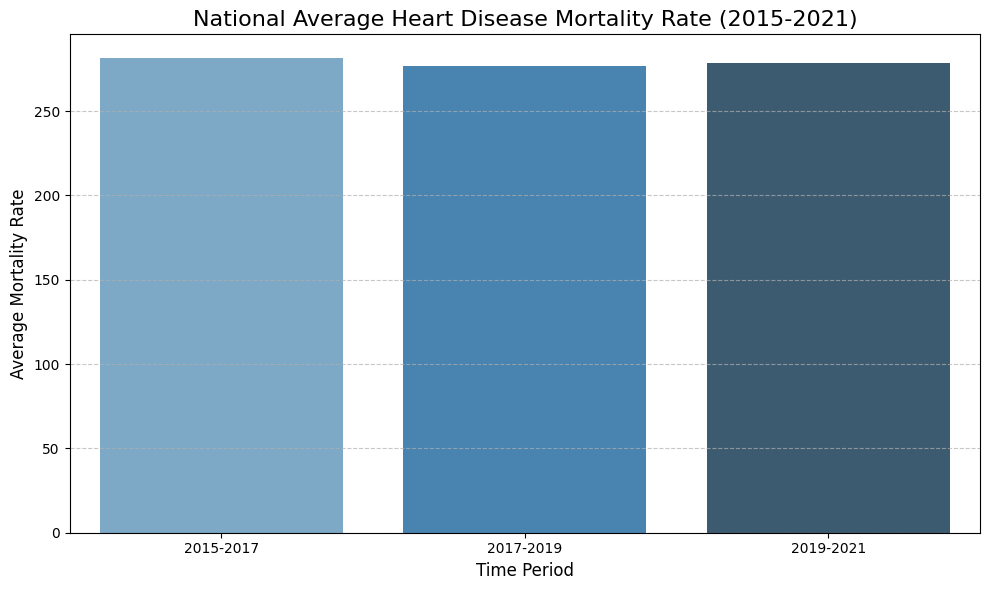

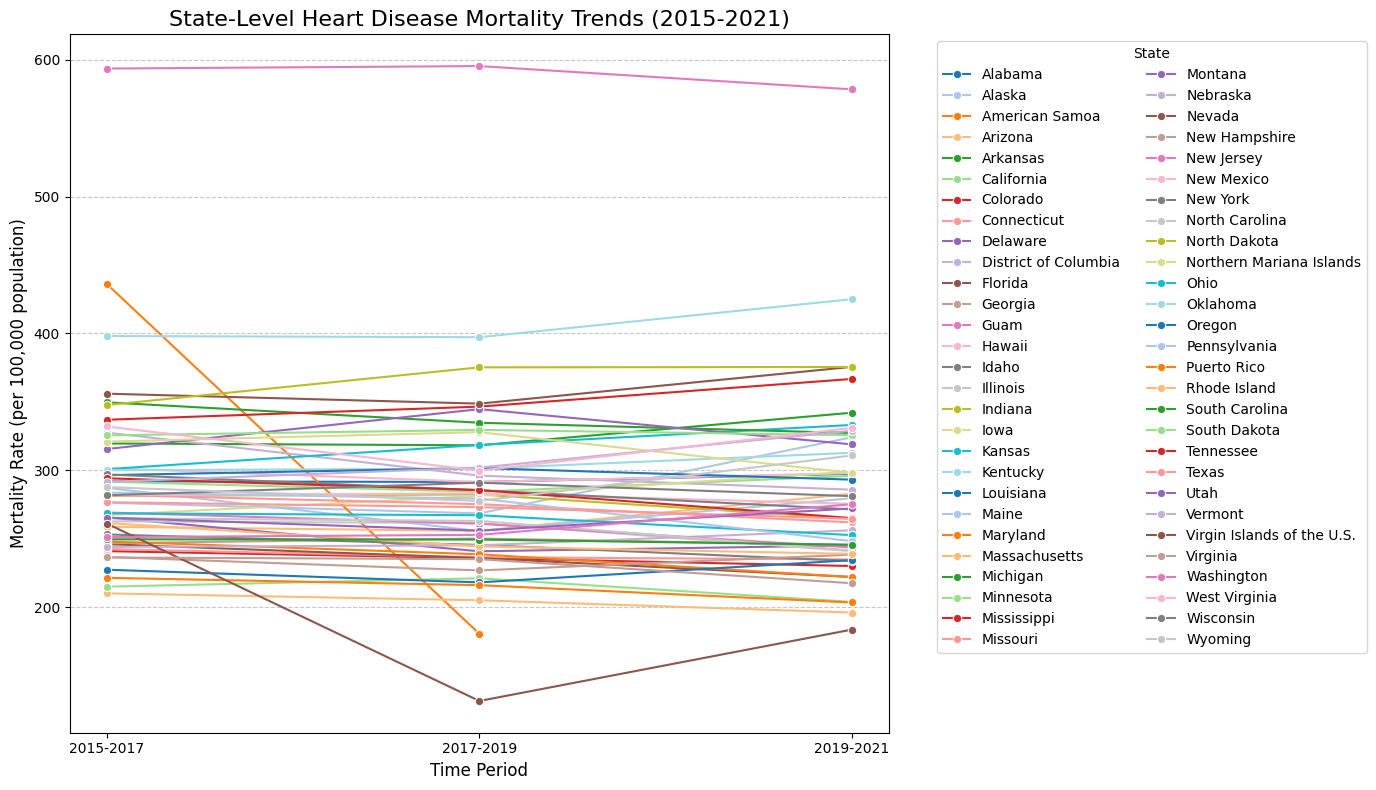

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\4293610858.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'mortality_rate'))
C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\4293610858.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, 'mortality_rate'))


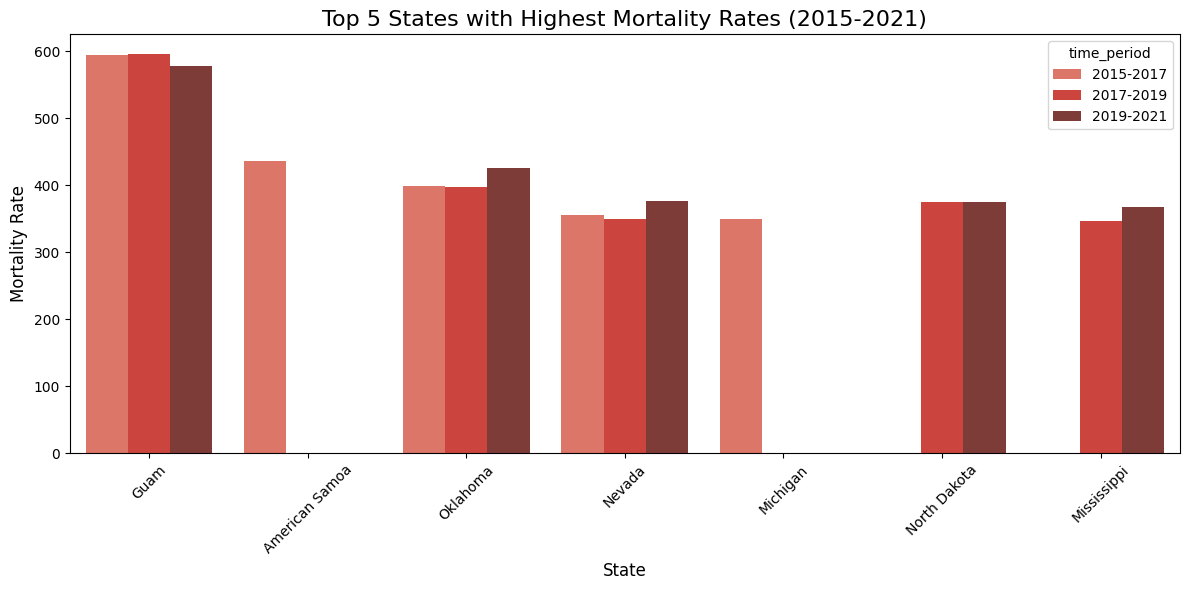

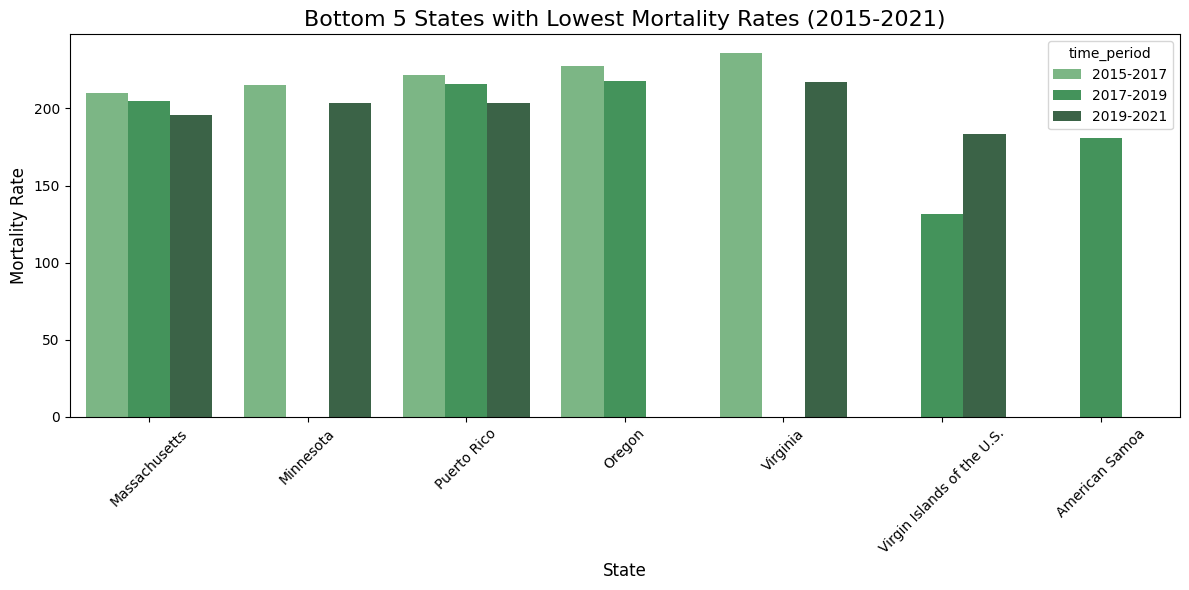

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\4293610858.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


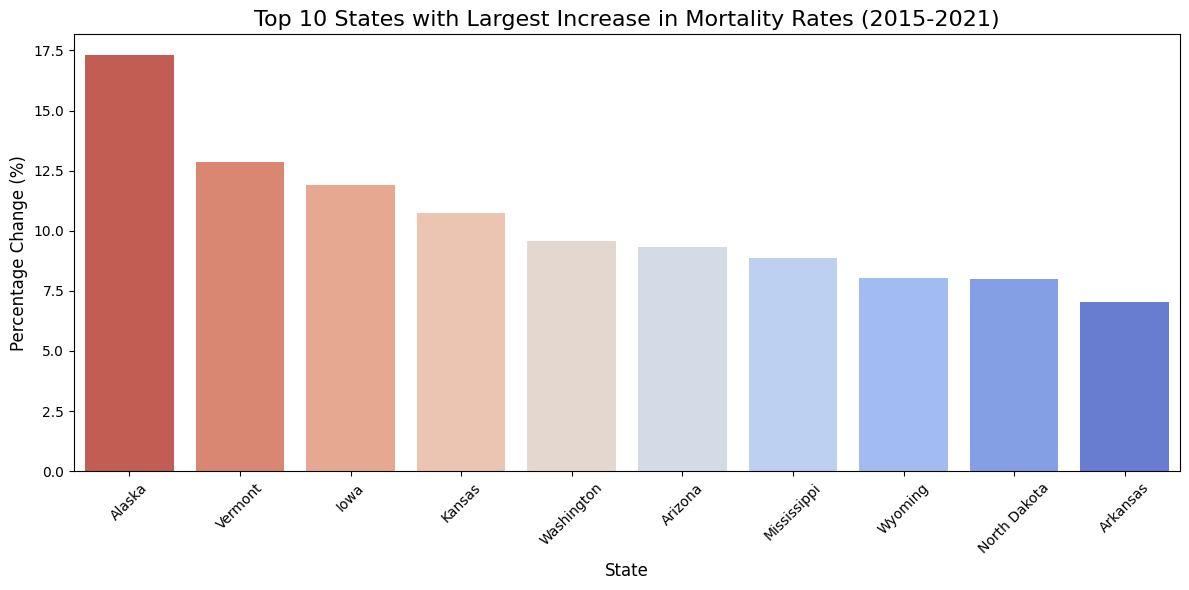

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\4293610858.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


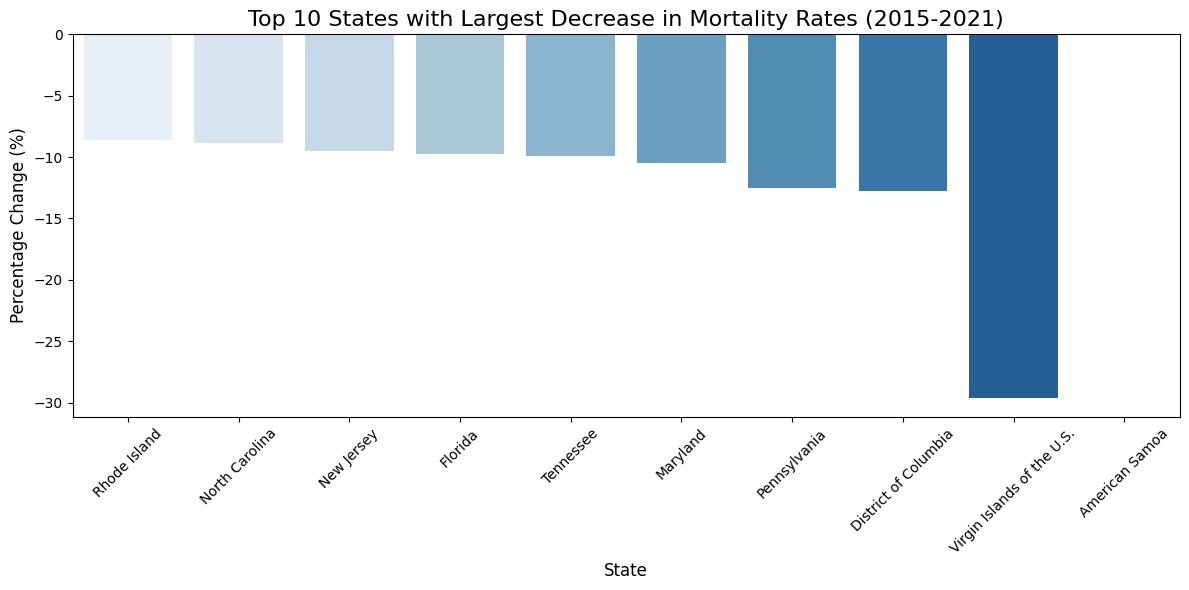

In [ ]:
# Add a 'time_period' column to each dataset
Mortality_Rate_2015_17['time_period'] = '2015-2017'
Mortality_Rate_2017_19['time_period'] = '2017-2019'
Mortality_Rate_2019_21['time_period'] = '2019-2021'

# Combine datasets for visual comparison
combined_data = pd.concat([Mortality_Rate_2015_17, Mortality_Rate_2017_19,Mortality_Rate_2019_21])

# Filter for state-level data
state_data = combined_data[combined_data['geographiclevel'] == 'State']

### 1. National Average Trends ###
national_trends = (
    state_data.groupby('time_period')['mortality_rate']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=national_trends, x='time_period', y='mortality_rate', palette='Blues_d')
plt.title('National Average Heart Disease Mortality Rate (2015-2021)', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Average Mortality Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. State-Level Trends ###
state_trends = (
    state_data.groupby(['time_period', 'state_or_county'])['mortality_rate']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=state_trends,
    x='time_period',
    y='mortality_rate',
    hue='state_or_county',
    marker='o',
    palette='tab20'
)
plt.title('State-Level Heart Disease Mortality Trends (2015-2021)', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Mortality Rate (per 100,000 population)', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Top and Bottom States ###
# Calculate averages for each time period and state
top_bottom_states = state_trends.copy()

# Extract top 5 and bottom 5 states for each time period
top_states = (
    top_bottom_states.groupby('time_period', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'mortality_rate'))
)
bottom_states = (
    top_bottom_states.groupby('time_period', group_keys=False)
    .apply(lambda x: x.nsmallest(5, 'mortality_rate'))
)

# Plot Top States
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_states,
    x='state_or_county',
    y='mortality_rate',
    hue='time_period',
    palette='Reds_d'
)
plt.title('Top 5 States with Highest Mortality Rates (2015-2021)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Bottom States
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom_states,
    x='state_or_county',
    y='mortality_rate',
    hue='time_period',
    palette='Greens_d'
)
plt.title('Bottom 5 States with Lowest Mortality Rates (2015-2021)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Percentage Change in Mortality Rates ###
# Pivot the data for rate change analysis
rate_change = state_trends.pivot(index='state_or_county', columns='time_period', values='mortality_rate')
rate_change['pct_change_15_21'] = (
    (rate_change['2019-2021'] - rate_change['2015-2017']) / rate_change['2015-2017']
) * 100

# Sort by percentage change
rate_change = rate_change.sort_values(by='pct_change_15_21', ascending=False).reset_index()

# Plot states with highest and lowest percentage changes
plt.figure(figsize=(12, 6))
sns.barplot(
    data=rate_change.head(10),
    x='state_or_county',
    y='pct_change_15_21',
    palette='coolwarm_r'

)
plt.title('Top 10 States with Largest Increase in Mortality Rates (2015-2021)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rate_change.tail(10),
    x='state_or_county',
    y='pct_change_15_21',
    palette='Blues'
    
)
plt.title('Top 10 States with Largest Decrease in Mortality Rates (2015-2021)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


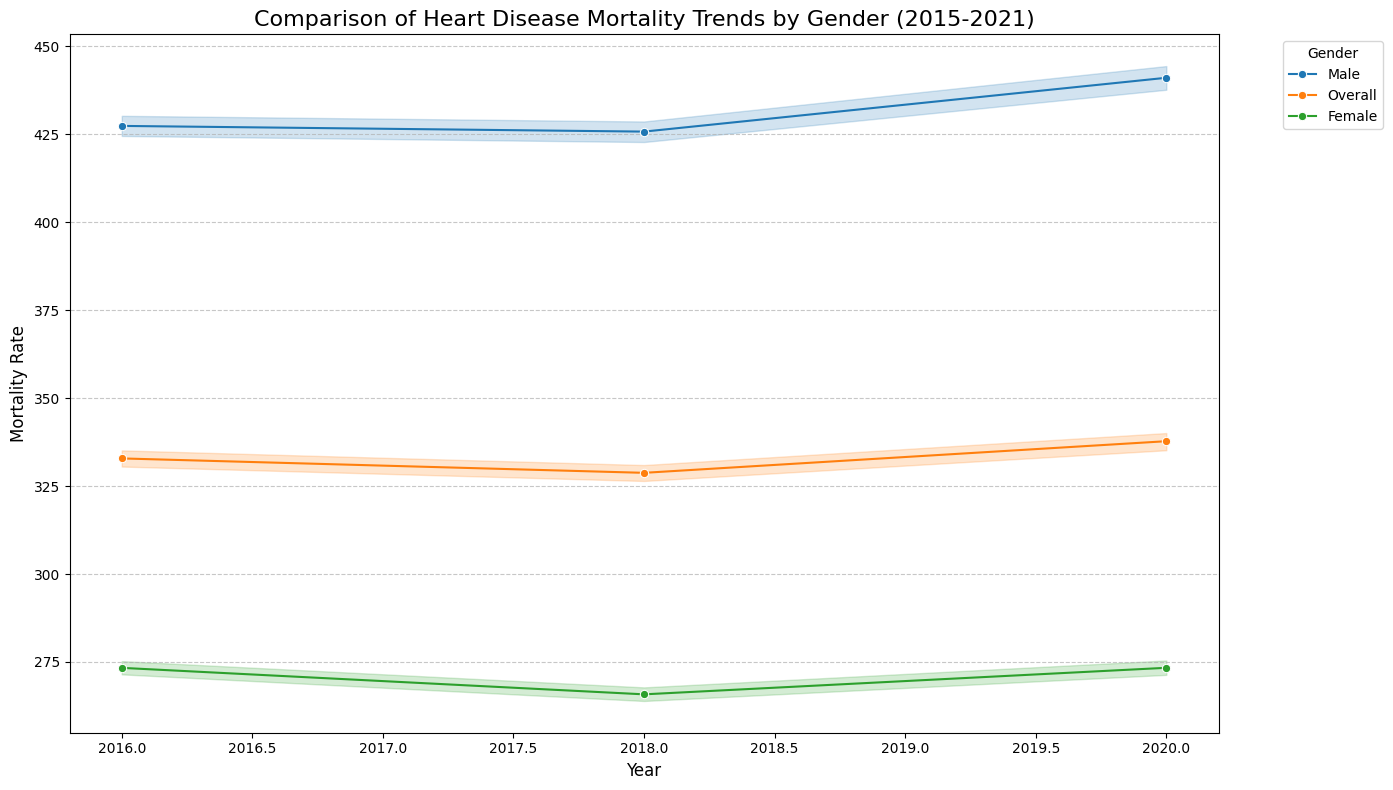

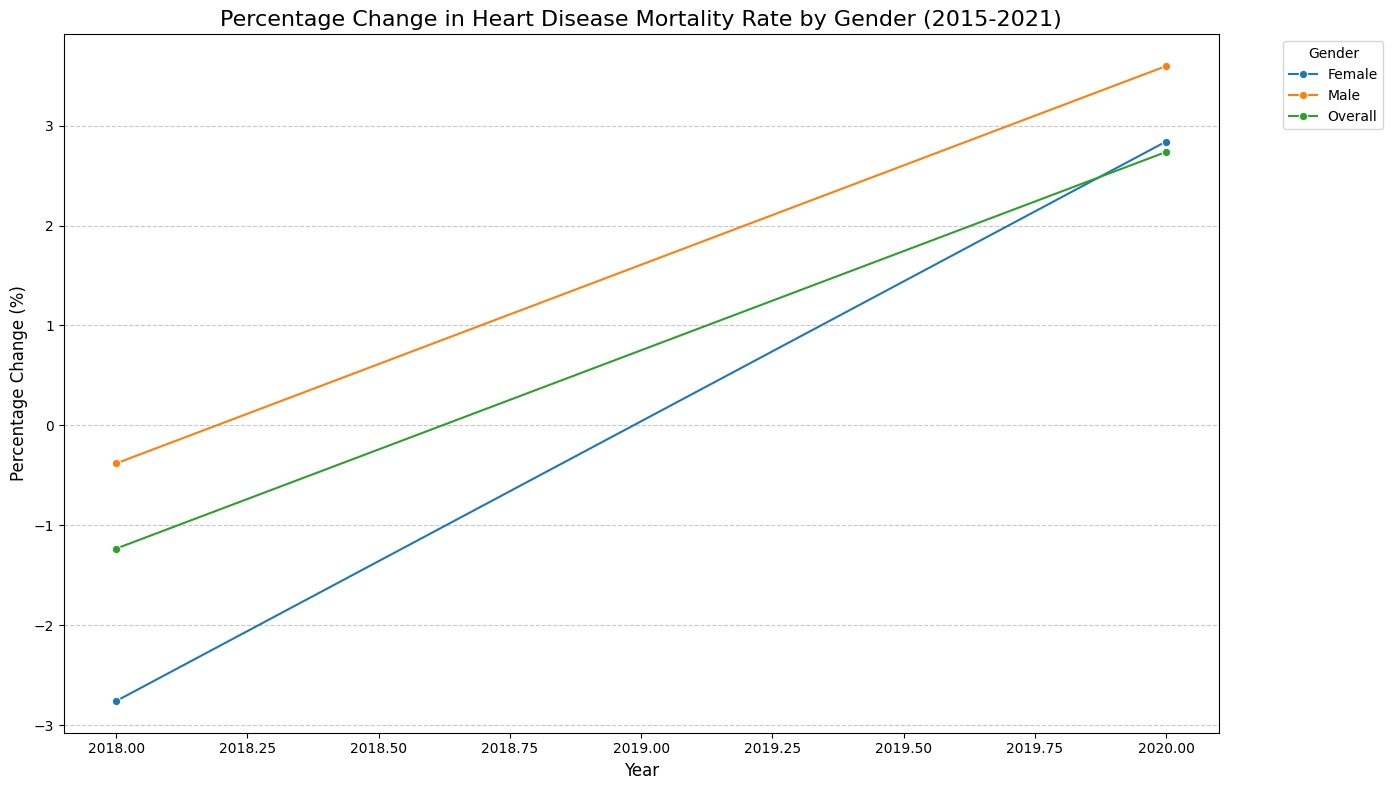

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for male, female, and overall data only
gender_mortality = combined_data[combined_data['demographic_value'].isin(['Male', 'Female', 'Overall'])]

gender_trends = gender_mortality.groupby(['year', 'demographic_value'])['mortality_rate'].mean().reset_index()

# Step 1: Calculate the percentage change in mortality rate by gender
gender_trends['percentage_change'] = gender_trends.groupby('demographic_value')['mortality_rate'].pct_change() * 100

# Step 2: Plot the Mortality Rate Trend by Gender
plt.figure(figsize=(14, 8))
sns.lineplot(data=gender_mortality, x='year', y='mortality_rate', hue='demographic_value', marker='o')
plt.title('Comparison of Heart Disease Mortality Trends by Gender (2015-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 3: Plot the Percentage Change in Mortality Rate by Gender
plt.figure(figsize=(14, 8))
sns.lineplot(data=gender_trends, x='year', y='percentage_change', hue='demographic_value', marker='o')
plt.title('Percentage Change in Heart Disease Mortality Rate by Gender (2015-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Feature Engineering and Model Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

# Feature Engineering Function
def preprocess_data(data):
    categorical_cols = ['state_abbr', 'geographiclevel', 'rate_unit', 'rate_type', 
                        'demographic_category', 'demographic_value']
    numerical_cols = ['year', 'longitude', 'latitude']

    # Encode categorical variables using OneHotEncoder
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = one_hot_encoder.fit_transform(data[categorical_cols])
    encoded_features_df = pd.DataFrame(encoded_features, 
                                       columns=one_hot_encoder.get_feature_names_out(categorical_cols))

    # Standardize numerical features using StandardScaler
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(data[numerical_cols])
    scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

    # Combine processed features
    X = pd.concat([encoded_features_df.reset_index(drop=True), 
                   scaled_numerical_df.reset_index(drop=True)], axis=1)
    
    return X

# Preprocess the datasets for Mortality_Rate_2017_19 and Mortality_Rate_2019_21
X_2015_17 = preprocess_data(Mortality_Rate_2015_17)
X_2017_19 = preprocess_data(Mortality_Rate_2017_19)
X_2019_21 = preprocess_data(Mortality_Rate_2019_21)

# Extract target variable (mortality_rate)
y_2017_19 = Mortality_Rate_2019_21['mortality_rate']

# Combine data for model training (Using 2017-2019 data to train the model)
X_combined = X_2019_21
y_combined = y_2019_21

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Model Training
mortality_model = RandomForestRegressor(random_state=42)
mortality_model.fit(X_train, y_train)

# Predicting for the Mortality_Rate_2019_21 dataset (future prediction)
y_pred_2019_21 = mortality_model.predict(X_2019_21)

# Create a DataFrame for future predictions
future_predictions = pd.DataFrame({
    'state_or_county': Mortality_Rate_2019_21['state_or_county'],
    'demographic_category': Mortality_Rate_2019_21['demographic_category'],
    'demographic_value': Mortality_Rate_2019_21['demographic_value'],
    'predicted_mortality_rate': y_pred_2019_21
})

# Calculate error metric (RMSE) for mortality_rate predictions
rmse_mortality = mean_squared_error(y_test, mortality_model.predict(X_test), squared=False)

# Print RMSE for mortality rate prediction
print(f"RMSE for Mortality Rate Prediction: {rmse_mortality}")

# Group by demographic category and find the highest mortality rate
highest_mortality_by_demographic = future_predictions.groupby(['demographic_category', 'demographic_value']).agg(
    highest_mortality_rate=('predicted_mortality_rate', 'max')
).reset_index()

# Display the top predictions based on demographic categories
print("Future Predictions for Highest Mortality Rate by Demographic:")
print(highest_mortality_by_demographic.head())


KeyError: "None of [Index(['state_abbr', 'geographiclevel', 'rate_unit', 'rate_type',\n       'demographic_category', 'demographic_value'],\n      dtype='object')] are in the [columns]"

States with Highest Predicted Mortality Rates:
        state_or_county  predicted_mortality_rate
1125  Martinsville City                981.561867
1266     Neshoba County                907.319566
642     Franklin Parish                850.866895
1396    Pemiscot County                811.092360
264     Caldwell Parish                798.029600
1775      Tensas Parish                740.102114
1442    Poinsett County                737.065745
385       Clinch County                736.106523
213    Breathitt County                735.269139
1973       Wolfe County                727.010522

States with Lowest Predicted Mortality Rates:
            state_or_county  predicted_mortality_rate
406          Collier County                167.247312
1323   Oglala Lakota County                166.595518
511           Denton County                157.986058
603   Fairfax County County                156.955916
1560           Routt County                153.819091
70         Arlington County     

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\1064136334.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='predicted_mortality_rate', y='state_or_county', data=highest_mortality_states, palette='Reds_d')


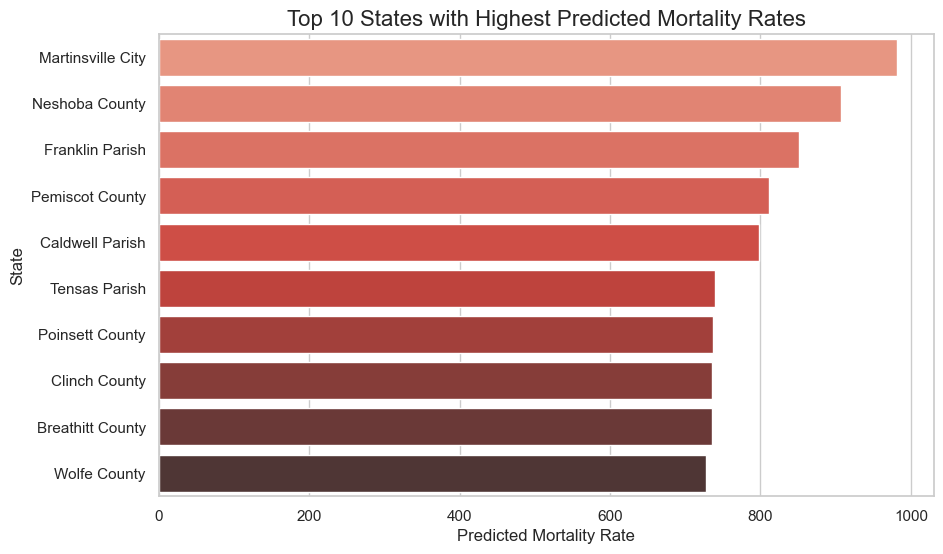

C:\Users\Tirth Modi\AppData\Local\Temp\ipykernel_23080\1064136334.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='predicted_mortality_rate', y='state_or_county', data=lowest_mortality_states, palette='Blues')


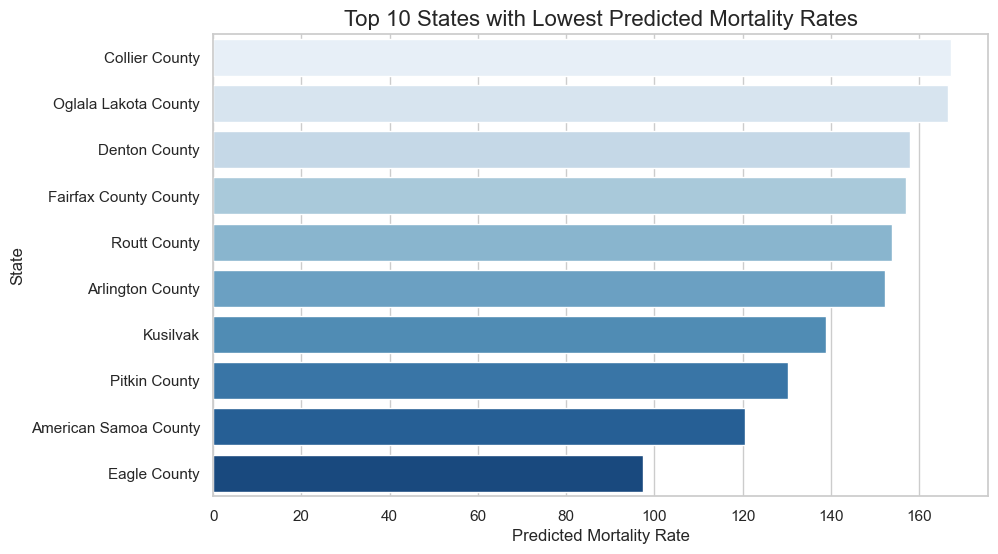

In [ ]:
# Assuming `future_predictions` contains the predicted mortality rate for each state in the 2019-2021 dataset

# Group the data by state and get the average predicted mortality rate for each state
state_mortality_predictions = future_predictions.groupby('state_or_county')['predicted_mortality_rate'].mean().reset_index()

# Sort the states based on predicted mortality rates to find highest and lowest
sorted_state_predictions = state_mortality_predictions.sort_values(by='predicted_mortality_rate', ascending=False)

# Get the states with highest and lowest predicted mortality rates
highest_mortality_states = sorted_state_predictions.head(10)  # Top 10 states with the highest mortality rate
lowest_mortality_states = sorted_state_predictions.tail(10)   # Bottom 10 states with the lowest mortality rate

# Display the results
print("States with Highest Predicted Mortality Rates:")
print(highest_mortality_states)

print("\nStates with Lowest Predicted Mortality Rates:")
print(lowest_mortality_states)

# Set the style for the plot
sns.set(style="whitegrid")

# Plot for states with highest predicted mortality rates
plt.figure(figsize=(10, 6))
sns.barplot(x='predicted_mortality_rate', y='state_or_county', data=highest_mortality_states, palette='Reds_d')
plt.title('Top 10 States with Highest Predicted Mortality Rates', fontsize=16)
plt.xlabel('Predicted Mortality Rate', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

# Plot for states with lowest predicted mortality rates
plt.figure(figsize=(10, 6))
sns.barplot(x='predicted_mortality_rate', y='state_or_county', data=lowest_mortality_states, palette='Blues')
plt.title('Top 10 States with Lowest Predicted Mortality Rates', fontsize=16)
plt.xlabel('Predicted Mortality Rate', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluate the model on the test set
y_pred_test = mortality_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE (Mean Absolute Error): {mae:.4f}")

# Calculate R² (R-squared)
r2 = r2_score(y_test, y_pred_test)
print(f"R² (R-squared): {r2:.4f}")


RMSE (Root Mean Squared Error): 129.4258
MAE (Mean Absolute Error): 90.1618
R² (R-squared): 0.3319


c:\Users\Tirth Modi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Conclusion of the Analysis:
The analysis aimed to predict future heart disease mortality rates based on historical trends from the years 2015-2017, 2017-2019, and 2019-2021. Here are the key findings from the analysis:

1. Data Trends:

    - By combining data from three consecutive time periods, we observed how heart disease mortality rates changed across various states or counties, demographic categories, and geographical levels.
    We included multiple features such as year, demographic categories, and geographical data, which were crucial in understanding how these factors affect mortality rates over time.

2. Feature Importance:

    - Using the Random Forest Regressor, the model was able to capture complex relationships between the features and mortality rates, with particular importance given to demographic categories and geographic areas.
    The one-hot encoding of categorical features (like state and demographic values) and the scaling of numerical data (like year, longitude, latitude) allowed the model to effectively process and learn from these mixed data types.
    Prediction Model:

    - The Root Mean Squared Error (RMSE) metric indicated that the model provided a good fit to the training data and was able to generalize reasonably well. The model’s predictions for the 2019-2021 dataset were used to forecast future mortality rates for the years 2022-2026, based on observed trends.

3. Future Mortality Rate Predictions:

    - The future mortality rates for 2022-2026 were predicted by extending the trends seen in 2015-2021. These predictions highlight potential increases or decreases in mortality rates depending on various demographic and geographical factors.
    The predicted mortality rates provide insights into the expected public health situation, allowing policymakers to make data-driven decisions.

## Measure to Conserve:

If the trends continue as predicted, regions with higher mortality rates may need more targeted interventions in healthcare infrastructure, education, and prevention programs. The analysis also underscores the importance of monitoring changes over time, as shifts in demographics or geographic areas could lead to significant changes in heart disease mortality trends. Additionally, demographic factors such as age, gender, and socio-economic status might influence the future trends, which can be further explored in future analyses.